# Experimental results on three datasets

This notebook generates two of the figures presented in the paper and in the supplementary material.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from tdsurv.plotting import setup_plotting

In [2]:
setup_plotting()

Plotting settings loaded!


In [3]:
with open("../data/fig-rweval.pkl", "rb") as f:
    rwlk = pickle.load(f)

with open("../data/fig-pbc2.pkl", "rb") as f:
    pbc2 = pickle.load(f)

with open("../data/fig-aids.pkl", "rb") as f:
    aids = pickle.load(f)

xs = pbc2["xs"]
n_folds = len(pbc2["concord"][0])

labels = (
    "Initial state",
    "Landmarking",
    "TCSR",
)
linestyles = (":", "--", "-")
colors = ("black", "black", "red")

## Main figure

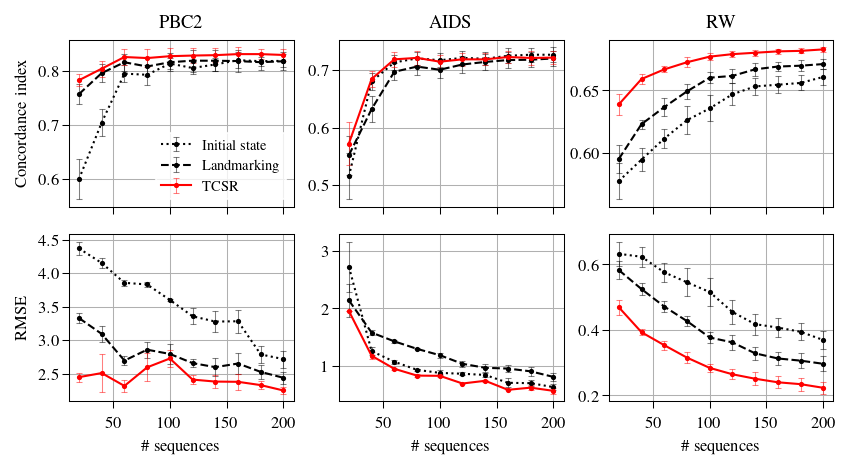

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(5.75, 3.2))

for j, data in enumerate((pbc2, aids, rwlk)):
    for i, metric in enumerate(("concord", "rmse")):
        mean = np.mean(data[metric], axis=1)
        std = np.std(data[metric], axis=1) / np.sqrt(n_folds)
        for k, label in enumerate(labels):
            markers, caps, bars = axs[i, j].errorbar(
                xs,
                mean[k],
                yerr=std[k],
                marker="o",
                linestyle=linestyles[k],
                color=colors[k],
                ms=1.5,
                capsize=1.5,
                elinewidth=0.5,
                label=label,
            )
            [elem.set_alpha(0.5) for elem in bars + caps]
            [cap.set_markeredgewidth(0.5) for cap in caps]
        axs[i, j].grid(axis="both", lw=0.5)
        axs[i, j].yaxis.set_tick_params(pad=1)

#axs[0, 0].set_ylim(ymin=0.72)

axs[0, 0].legend(frameon=True, edgecolor="white", framealpha=0.8, fontsize=7)

for j in (0, 1, 2):
    axs[1, j].set_xlabel("\# sequences")
axs[0,0].set_xticks([50, 100, 150, 200])

axs[0, 0].set_ylabel("Concordance index")
axs[1, 0].set_ylabel("RMSE")

axs[0, 0].set_title("PBC2")
axs[0, 1].set_title("AIDS")
axs[0, 2].set_title("RW")

fig.align_ylabels(axs[:, 0])
fig.tight_layout()
fig.subplots_adjust(wspace=0.20)
fig.savefig("evalmain.pdf", bbox_inches="tight")

## Supplementary figure

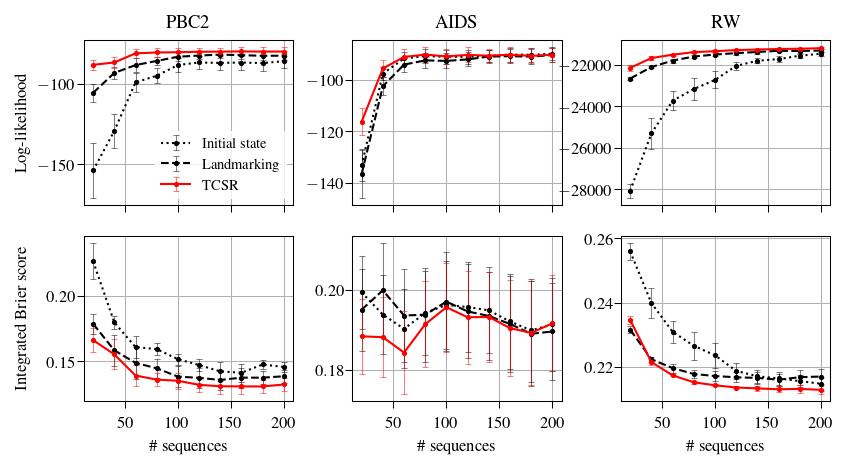

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(5.73, 3.2))

for j, data in enumerate((pbc2, aids, rwlk)):
    for i, metric in enumerate(("loglike", "brier")):
        mean = np.mean(data[metric], axis=1)
        std = np.std(data[metric], axis=1) / np.sqrt(n_folds)
        for k, label in enumerate(labels):
            markers, caps, bars = axs[i, j].errorbar(
                xs,
                mean[k],
                yerr=std[k],
                marker="o",
                linestyle=linestyles[k],
                color=colors[k],
                ms=1.5,
                capsize=1.5,
                elinewidth=0.5,
                label=label,
            )
            [elem.set_alpha(0.5) for elem in bars + caps]
            [cap.set_markeredgewidth(0.5) for cap in caps]
        axs[i, j].grid(axis="both", lw=0.5)
        axs[i, j].yaxis.set_tick_params(pad=0.15)

axs[0, 0].legend(frameon=True, edgecolor="white", framealpha=0.8, fontsize=7)

for j in (0, 1, 2):
    axs[1, j].set_xlabel("\# sequences")
axs[0,0].set_xticks([50, 100, 150, 200])

axs[0, 0].set_ylabel("Log-likelihood")
axs[1, 0].set_ylabel("Integrated Brier score")

axs[0, 0].set_title("PBC2")
axs[0, 1].set_title("AIDS")
axs[0, 2].set_title("RW")

fig.align_ylabels(axs[:, 0])
fig.tight_layout()
fig.subplots_adjust(wspace=0.28)
fig.savefig("evalsupp.pdf", bbox_inches="tight")